* **ÏöîÏïΩ**ÏùÄ ÏûÖÎ†•Í≥º Ï∂úÎ†•Ïù¥ ÌÖçÏä§Ìä∏Ïù∏, Í≥†Ï†ÑÏ†ÅÏù∏ ÏãúÌÄÄÏä§-Ìà¨-ÏãúÌÄÄÏä§ seq2seq ÏûëÏóÖ
  * Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏Í∞Ä Ïûò ÎßûÏùå

# **0. Library**

In [ ]:
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=6)
# Base ; ["transformers", "datasets", "accelerate", "sentencepiece", "sacrebleu", "rouge-score", "nltk", "py7zr"],
# Ch 6 ; 
  # nltk==3.6.6 ; Natural Language Toolkit
  # sacrebleu==1.5.1
  # rouge-score==0.0.4
  # py7zr # Needed for samsum dataset

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 588, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 588 (delta 5), reused 3 (delta 1), pack-reused 569
Receiving objects: 100% (588/588), 57.41 MiB | 35.27 MiB/s, done.
Resolving deltas: 100% (293/293), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.27.1
Using datasets v2.10.1
Using accelerate v0.17.1
Using sentencepiece v0.1.97
Using sacrebleu v2.3.1
Using rouge_score
Using nltk v3.8.1
Using py7zr v0.20.4


In [ ]:
from transformers import pipeline, set_seed

# **1. Dataset**

In [ ]:
from datasets import load_dataset

# "cnn_dailymail" Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ΩÏö∞ ÎåÄÏã† "ccdv/cnn_dailymail"ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
dataset = load_dataset("cnn_dailymail", version="3.0.0") 

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/default/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

**CNN/DailyMail** 
* 300,000Í∞ú Îâ¥Ïä§ Í∏∞ÏÇ¨ÏôÄ ÏöîÏïΩÏùò ÏåçÏúºÎ°ú Íµ¨ÏÑ±
* ÏöîÏïΩÏùÄ Î≥∏Î¨∏ÏóêÏÑú Ï∂îÏ∂úÎêòÏßÄ ÏïäÍ≥† Ï∂îÏÉÅÏ†Å
* 3.0.0 Î≤ÑÏ†ÑÏùÄ ÏùµÎ™ÖÌôî Ï≤òÎ¶¨ X

In [ ]:
sample = dataset["train"][1]
sample

{'article': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less li

In [ ]:
print(sample['article'])

Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events. Here,
Soledad O'Brien takes users inside a jail where many of the inmates are mentally
ill. An inmate housed on the "forgotten floor," where many mentally ill inmates
are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the
Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here,
inmates with the most severe mental illnesses are incarcerated until they're
ready to appear in court. Most often, they face drug charges or charges of
assaulting an officer --charges that Judge Steven Leifman says are usually
"avoidable felonies." He says the arrests often result from confrontations with
police. Mentally ill people often won't do what they're told when police arrive
on the scene -- confrontation seems to exacerbate their illness and they become
more paranoid, delusional, and less likely to follow dir

In [ ]:
print(f"ÌäπÏÑ±: {dataset['train'].column_names}")

ÌäπÏÑ±: ['article', 'highlights', 'id']


In [ ]:
print(f"""Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: {len(sample["article"])}):""")
print(sample["article"][:500])
print(f'\nÏöîÏïΩ (Í∏∏Ïù¥: {len(sample["highlights"])}):')
print(sample["highlights"])

Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: 4051):
Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events. Here,
Soledad O'Brien takes users inside a jail where many of the inmates are mentally
ill. An inmate housed on the "forgotten floor," where many mentally ill inmates
are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the
Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here,
inmates with the most s

ÏöîÏïΩ (Í∏∏Ïù¥: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


Mentally ill inmates in Miami are housed on the "forgotten floor"

ÎßàÏù¥Ïï†ÎØ∏ÏóêÏÑú Ï†ïÏã† ÏßàÌôòÏûê ÏàòÍ∞êÏûêÎì§Ïù¥ 'ÏûäÌòÄÏßÑ Ï∏µ'ÏóêÏÑú ÏàòÏö©ÎêòÍ≥† ÏûàÏäµÎãàÎã§. 


---


Judge Steven Leifman says most are there as a result of "avoidable felonies"

Ïä§Ìã∞Î∏ê ÎùºÏù¥ÌîÑÎ®º ÌåêÏÇ¨Îäî Í∑∏Îì§ ÎåÄÎ∂ÄÎ∂ÑÏù¥ "ÏòàÎ∞© Í∞ÄÎä•Ìïú Ï§ëÏ£Ñ"Î°ú Ïù¥Í≥≥Ïóê ÏàòÍ∞êÎêòÏñ¥ ÏûàÎã§Í≥† ÎßêÌï©ÎãàÎã§.


---


While CNN tours facility, patient shouts: "I am the son of the president"

CNNÏù¥ ÏãúÏÑ§ÏùÑ Í≤¨ÌïôÌïòÎäî ÎèôÏïà Ìïú ÌôòÏûêÎäî "ÎÇòÎäî ÎåÄÌÜµÎ†πÏùò ÏïÑÎì§Ïù¥Îã§"ÎùºÍ≥† Ïô∏Ï≥§ÏäµÎãàÎã§.


---


Leifman says the system is unjust and he's fighting for change .

ÎùºÏù¥ÌîÑÎ®º ÌåêÏÇ¨Îäî ÏãúÏä§ÌÖúÏù¥ Î∂àÍ≥µÌèâÌïòÎ©∞ Î≥ÄÌôîÎ•º ÏúÑÌï¥ Ïã∏Ïö∞Í≥† ÏûàÎã§Í≥† ÎßêÌï©ÎãàÎã§.

# **2. Pipeline**
* ÏöîÏïΩÏóêÏÑúÎäî Í¥ÄÎ°ÄÏ†ÅÏúºÎ°ú ÏöîÏïΩ Î¨∏Ïû•ÏùÑ Ï§ÑÎ∞îÍøàÏúºÎ°ú ÎÇòÎàî


In [ ]:
sample_text = dataset["train"][1]["article"][:2000] # ÏúÑ SampleÏùò article 2000Î¨∏ÏûêÍπåÏßÄÏßÄ
print(f'sample_textÏùò Í∏∏Ïù¥ : {len(sample_text)}')
sample_text

sample_textÏùò Í∏∏Ïù¥ : 2000


'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [ ]:
summaries = {}

## 2.1. nltk sent_tokenize

- Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî, ÌÜ†ÌÅ∞Ïùò Îã®ÏúÑÎ•º Î¨∏Ïû•ÏúºÎ°ú ÌïòÏó¨ ÏΩîÌçºÏä§ ÎÇ¥ ÌÖçÏä§Ìä∏Î•º Î¨∏Ïû• Îã®ÏúÑÎ°ú Íµ¨Î∂ÑÌïòÎäî ÏûëÏóÖ

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize # Íµ¨ÎëêÏ†ê, ÏïΩÏñ¥ Îì±ÏùÑ Íµ¨Î≥ÑÌïòÎäî Ï†ïÍµêÌïú ÏïåÍ≥†Î¶¨Ï¶ò ÏûàÏùå

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string) # Î¨∏Ïû• ÎÇòÎà† ÏöîÏïΩÌï¥Ï§å

['The U.S. are a country.', 'The U.N. is an organization.']

In [ ]:
def three_sentence_summary(text): # Îß® Ï≤òÏùå Î¨∏Ïû• ÏÑ∏ Í∞ú
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries["baseline"] = three_sentence_summary(sample_text)

In [ ]:
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'}

In [ ]:
print(summaries['baseline'])

Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are
mentally ill. An inmate housed on the "forgotten floor," where many mentally ill
inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention
facility is dubbed the "forgotten floor."


In [ ]:
print(sample['highlights'])

Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


## 2.2. GPT-2
* ÏûÖÎ†• ÌÖçÏä§Ìä∏ Îí§Ïóê 'TL;DR'ÏùÑ Ï∂îÍ∞ÄÌï¥ ÏöîÏïΩÏùÑ ÏÉùÏÑ±
* TL;DR : too long; didn't read

In [ ]:
from transformers import pipeline, set_seed

set_seed(42)

In [ ]:
pipe = pipeline("text-generation", model="gpt2-xl") # gpt2-xl Î©îÎ™®Î¶¨ Ï£ºÏùò -> gpt or gpt2-large

In [ ]:
gpt2_query = sample_text + "\nTL;DR:\n"
print(gpt2_query)

Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events. Here,
Soledad O'Brien takes users inside a jail where many of the inmates are mentally
ill. An inmate housed on the "forgotten floor," where many mentally ill inmates
are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the
Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here,
inmates with the most severe mental illnesses are incarcerated until they're
ready to appear in court. Most often, they face drug charges or charges of
assaulting an officer --charges that Judge Steven Leifman says are usually
"avoidable felonies." He says the arrests often result from confrontations with
police. Mentally ill people often won't do what they're told when police arrive
on the scene -- confrontation seems to exacerbate their illness and they become
more paranoid, delusional, and less likely to follow dir

In [ ]:
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)
pipe_out

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


[{'generated_text': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and

In [ ]:
print(pipe_out[0]['generated_text'])

Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events. Here,
Soledad O'Brien takes users inside a jail where many of the inmates are mentally
ill. An inmate housed on the "forgotten floor," where many mentally ill inmates
are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the
Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here,
inmates with the most severe mental illnesses are incarcerated until they're
ready to appear in court. Most often, they face drug charges or charges of
assaulting an officer --charges that Judge Steven Leifman says are usually
"avoidable felonies." He says the arrests often result from confrontations with
police. Mentally ill people often won't do what they're told when police arrive
on the scene -- confrontation seems to exacerbate their illness and they become
more paranoid, delusional, and less likely to follow dir

In [ ]:
summaries["gpt2"] = "\n".join(
    sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."',
 'gpt2': '- No shoes.\n- No bed.\n- No mattress.\n- Some inmates sleeping on the floor.\n- Lacks security.\n- Insufficient funds to provide mental health care.'}

## 2.3. T5
* T5Îäî ÏöîÏïΩÏùÑ Ìè¨Ìï®Ìïú Ïó¨Îü¨ ÏûëÏóÖÏóêÏÑú ÎßàÏä§ÌÇπÎêú Îã®Ïñ¥Î•º Ïû¨Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú ÎπÑÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÏÑûÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®Îê®
  * Îî∞ÎùºÏÑú ÎØ∏ÏÑ∏ ÌäúÎãù ÏóÜÏù¥ Ïù¥ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º ÏÇ¨Ï†Ñ ÌõàÎ†®Ïóê ÏçºÎçò Í≤ÉÍ≥º ÎèôÏùºÌïú ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏÇ¨Ïö©Ìï¥ Î∞îÎ°ú ÏöîÏïΩÏóê ÏÇ¨Ïö© Í∞ÄÎä•
  

In [ ]:
pipe = pipeline("summarization", model="t5-large")

/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
pipe_out = pipe(sample_text)
print(pipe_out)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


[{'summary_text': 'mentally ill inmates are housed on the ninth floor of a
florida jail . most face drug charges or charges of assaulting an officer .
judge says arrests often result from confrontations with police . one-third of
all people in Miami-dade county jails are mental ill .'}]


In [ ]:
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."',
 'gpt2': '- No shoes.\n- No bed.\n- No mattress.\n- Some inmates sleeping on the floor.\n- Lacks security.\n- Insufficient funds to provide mental health care.',
 't5': 'mentally ill inmates are housed on the ninth floor of a florida jail .\nmost face drug charges or charges of assaulting an officer .\njudge says arrests often result from confrontations with police .\none-third of all people in Miami-dade county jails are mental ill .'}

## 2.4. BART
* Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçîÎ•º ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏, ÏÜêÏÉÅÎêú ÏûÖÎ†•ÏùÑ Ïû¨Íµ¨ÏÑ±ÌïòÎèÑÎ°ù ÌõàÎ†®
*  BERTÏôÄ GPT-2Ïùò ÏÇ¨Ï†Ñ ÌõàÎ†® Î∞©Ïãù Í≤∞Ìï© 

In [ ]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn") # facebook/bart-large-cnn ; CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎØ∏ÏÑ∏ ÌäúÎãùÎê®

In [ ]:
pipe_out = pipe(sample_text)
print(pipe_out)

[{'summary_text': 'Mentally ill inmates are housed on the "forgotten floor" of
Miami-Dade jail. Most often, they face drug charges or charges of assaulting an
officer. Judge Steven Leifman says the arrests often result from confrontations
with police. He says about one-third of all people in the county jails are
mentally ill.'}]


In [ ]:
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."',
 'gpt2': '- No shoes.\n- No bed.\n- No mattress.\n- Some inmates sleeping on the floor.\n- Lacks security.\n- Insufficient funds to provide mental health care.',
 't5': 'mentally ill inmates are housed on the ninth floor of a florida jail .\nmost face drug charges or charges of assaulting an officer .\njudge says arrests often result from confrontations with police .\none-third of all people in Miami-dade county jails are mental ill .',
 'bart': 'Mentally ill inmates are housed on the "forgotten floor" o

## 2.5. PEGASUS
* Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏ 
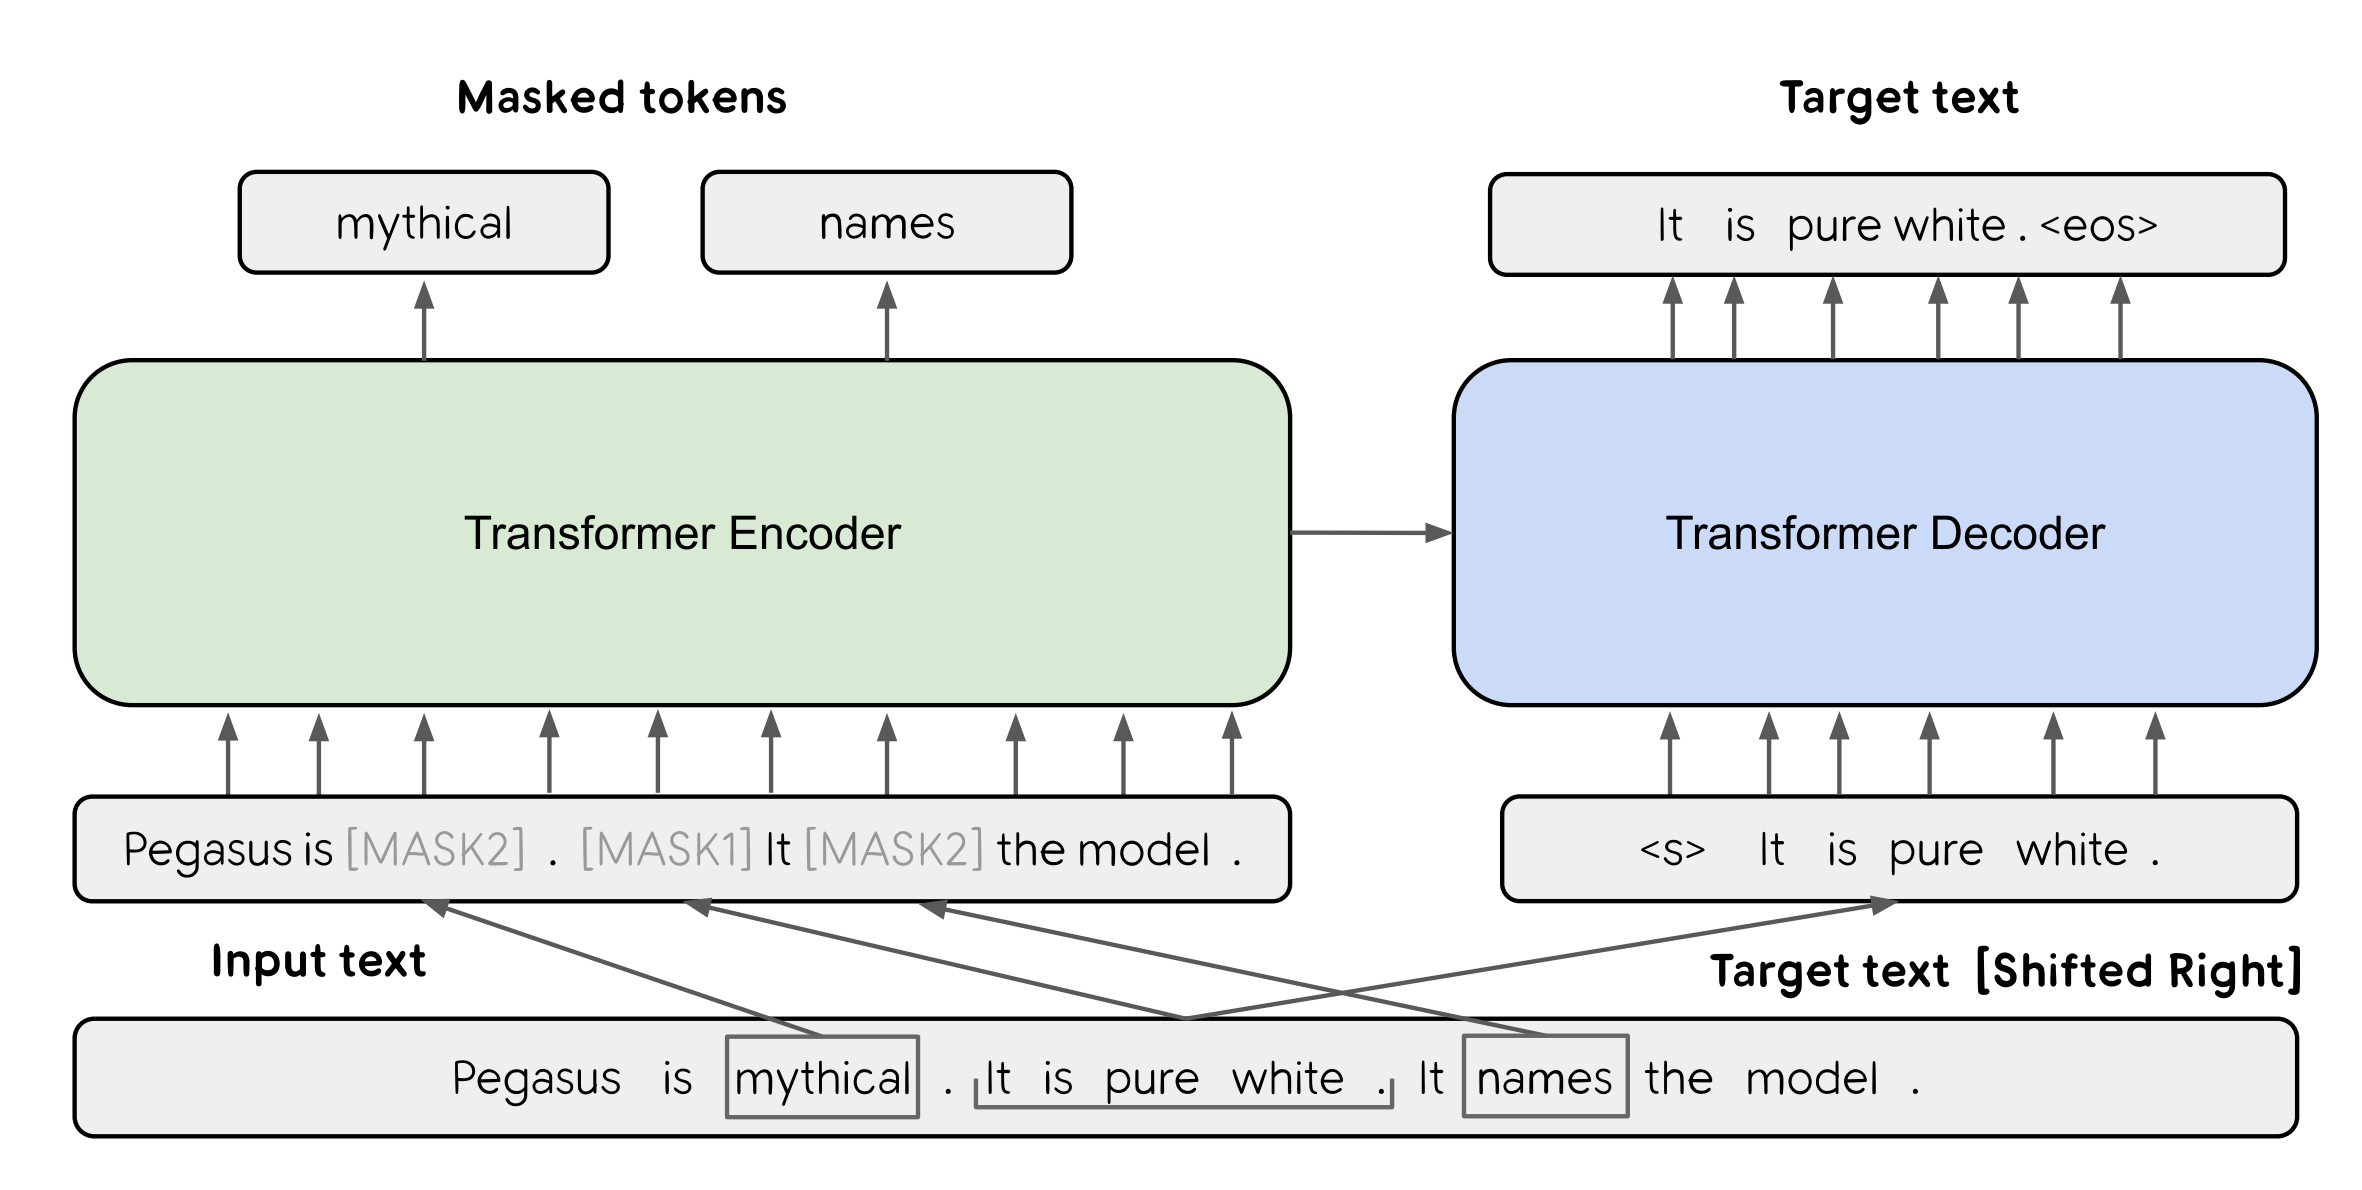

* Ïó¨Îü¨ Î¨∏Ïû•ÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖçÏä§Ìä∏ÏóêÏÑú ÎßàÏä§ÌÇπÎêú Î¨∏Ïû•ÏùÑ ÏòàÏ∏°ÌïòÎäî ÏÇ¨Ï†Ñ ÌõàÎ†® Î™©ÌëúÎ°ú ÌõàÎ†®ÎêêÏùå

In [ ]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")

In [ ]:
pipe_out = pipe(sample_text)
print(pipe_out)

[{'summary_text': 'Mentally ill inmates in Miami are housed on the "forgotten
floor"<n>The ninth floor is where they\'re held until they\'re ready to appear
in court .<n>Most often, they face drug charges or charges of assaulting an
officer .<n>They end up on the ninth floor severely mentally disturbed .'}]


In [ ]:
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."',
 'gpt2': '- No shoes.\n- No bed.\n- No mattress.\n- Some inmates sleeping on the floor.\n- Lacks security.\n- Insufficient funds to provide mental health care.',
 't5': 'mentally ill inmates are housed on the ninth floor of a florida jail .\nmost face drug charges or charges of assaulting an officer .\njudge says arrests often result from confrontations with police .\none-third of all people in Miami-dade county jails are mental ill .',
 'bart': 'Mentally ill inmates are housed on the "forgotten floor" o

# **3. ÏöîÏïΩ Í≤∞Í≥º ÎπÑÍµê Î∞è ÌèâÍ∞Ä**
* GPT-2 : Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†ÑÌòÄ ÌõàÎ†®ÎêòÏßÄ ÏïäÏùå
* T5 : Ïó¨Îü¨ ÏûëÏóÖ Ï§ëÏùò ÌïòÎÇòÏù∏ Ïù¥ ÏûëÏóÖÏùÑ ÏúÑÌï¥ ÎØ∏ÏÑ∏ ÌäúÎãùÎê®
* BART, PEGASUS : Ïù¥ ÏûëÏóÖÎßåÏùÑ ÏúÑÌï¥ ÎØ∏ÏÑ∏ ÌäúÎãùÎê® 

In [ ]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"]) # Ïã§Ï†ú ÏöîÏïΩÎ≥∏
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .

BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are
mentally ill. An inmate housed on the "forgotten floor," where many mentally ill
inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention
facility is dubbed the "forgotten floor."

GPT2
- No shoes.
- No bed.
- No mattress.
- Some inmates sleeping on the floor.
- Lacks security.
- Insufficient funds to provide mental health care.

T5
mentally ill inmates are housed on the ninth floor of a florida jail 

* **GPT-2**
  * ÏßÑÏßú ÏöîÏïΩÏùÑ ÌïòÎèÑÎ°ù Î™ÖÏãúÏ†ÅÏúºÎ°ú ÌõàÎ†®ÎêòÏßÄ ÏïäÏùå
  * Ï¢ÖÏ¢Ö ÏÇ¨Ïã§ÏùÑ ÏßÄÏñ¥ÎÇ¥Í±∞ÎÇò, ÌôòÏÉÅÏùÑ ÎßåÎì§Ïñ¥ÎÉÑ
* **PEGASUS, T5, BART**
  * ÎπÑÏä∑Ìï®
  * Ï±ÖÏóêÏÑúÎäî PEGASUS Ï∂úÎ†•Ïù¥ Ï†ïÎãµ Ï∂úÎ†•Í≥º Í∞ÄÏû• ÎπÑÏä∑ÌïòÎã§Í≥† ÌïòÎäîÎç∞, Îç∞Ïù¥ÌÑ∞Í∞Ä Îã¨ÎùºÏÑú Í∑∏Îü∞ÎìØ

* ÌÖçÏä§Ìä∏ ÏÉùÏÑ±Ïóê Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÌåêÎ≥ÑÌïòÍ∏∞
  * Ïó¨ÌÉú ÏÇ¨Ïö©Ìïú Ï†ïÌôïÎèÑ, Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú® Í∞ôÏùÄ Í±¥ Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùå
  * Ï†ïÎãµ ÏöîÏïΩÏóêÏÑú ÎèôÏùòÏñ¥Î•º Ïì∞Í±∞ÎÇò Ï°∞Í∏àÏî© Î∞îÍæ∏Í±∞ÎÇò Ìï¥ÏÑú ÏàòÏã≠ Í∞úÏùò ÏöîÏïΩÏù¥ ÎÇòÏò¨ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏

## 3.1. BLEU
* ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ÏóêÏÑú ÏñºÎßàÎÇò ÎßéÏùÄ ÌÜ†ÌÅ∞Ïù¥ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Í≥º ÏôÑÎ≤ΩÌïòÍ≤å Ï†ïÎ†¨ÎêêÎäîÏßÄ ÌôïÏù∏, Îã®Ïñ¥ ÎòêÎäî n-Í∑∏Îû®ÏùÑ Ï≤¥ÌÅ¨
* Ï†ïÎ∞ÄÎèÑÎ•º Í∑ºÍ∞ÑÏúºÎ°ú ÌïòÎäî ÏßÄÌëú
* Îëê ÌÖçÏä§Ìä∏Î•º ÎπÑÍµêÌï† Îïå, Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Îã®Ïñ¥Í∞Ä ÏÉùÏÑ±Îêú Îã®Ïñ¥ ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ Ïπ¥Ïö¥Ìä∏, Í∑∏ ÌõÑ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Î°ú ÎÇòÎàî

In [ ]:
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

<ipython-input-57-eacc06f6d0e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


In [ ]:
# Example

import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                          0.0
counts                [2, 0, 0, 0]
totals                [6, 5, 4, 3]
precisions  [33.33, 0.0, 0.0, 0.0]
bp                             1.0
sys_len                          6
ref_len                          6

In [ ]:
bleu_metric.add(
    prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                        57.893007
counts                    [5, 3, 2, 1]
totals                    [5, 4, 3, 2]
precisions  [100.0, 75.0, 66.67, 50.0]
bp                            0.818731
sys_len                              5
ref_len                              6

## 3.2. ROUGE

In [ ]:
rouge_metric = load_metric("rouge")

In [ ]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

In [ ]:
reference

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

In [ ]:
for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

rouge1    rouge2    rougeL  rougeLsum
baseline  0.365079  0.145161  0.206349   0.285714
gpt2      0.114286  0.029412  0.114286   0.114286
t5        0.382979  0.130435  0.255319   0.382979
bart      0.475248  0.222222  0.316832   0.415842
pegasus   0.323232  0.206186  0.282828   0.323232

## CNN/DailyMail DatasetÏóêÏÑú PEGASUS ÌèâÍ∞Ä

In [ ]:
import matplotlib.pyplot as plt
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [ ]:
# dataset = load_dataset("cnn_dailymail", version="3.0.0") 
rouge_metric = load_metric("rouge", cache_dir=None)
# rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

In [ ]:
def evaluate_summaries_baseline(dataset, metric,
                                column_text="article", 
                                column_summary="highlights"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])    
    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000)) # 1000Í∞ú ÎûúÎç§ Ï∂îÏ∂ú

score = evaluate_summaries_baseline(test_sampled, rouge_metric) # Í∏∞Î≥∏Í∞í ÏßÄÏ†ïÌï¥Ï§Ä column_text, column_summaryÎäî ÏûÖÎ†• ÏïäÏïÑÎèÑ Îê®
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names) # rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

rouge1    rouge2    rougeL  rougeLsum
baseline  0.389276  0.171296  0.245061   0.354239

In [ ]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def chunks(list_of_elements, batch_size):
    """list_of_elementsÎ°úÎ∂ÄÌÑ∞ batch_size ÌÅ¨Í∏∞Ïùò Ï≤≠ÌÅ¨Î•º Ïó∞ÏÜçÏ†ÅÏúºÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§"""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer, 
                               batch_size=16, device=device, 
                               column_text="article", 
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):
        
        inputs = tokenizer(article_batch, max_length=1024,  truncation=True, 
                        padding="max_length", return_tensors="pt")
        
        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device), 
                         length_penalty=0.8, num_beams=8, max_length=128)
        
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, 
                                clean_up_tokenization_spaces=True) 
               for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)
        
    score = metric.compute()
    return score

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric, 
                                   model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [07:59<00:00,  3.84s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.434473  0.216573  0.311855   0.374261

In [ ]:
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.434473  0.216573  0.311855   0.374261

In [ ]:
dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Dataset samsum downloaded and prepared to /root/.cache/huggingface/datasets/samsum/samsum/0.0.0/f1d7c6b7353e6de335d444e424dc002ef70d1277109031327bc9cc6af5d3d46e. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(f"Î∂ÑÌï† ÌÅ¨Í∏∞: {split_lengths}")
print(f"ÌäπÏÑ±: {dataset_samsum['train'].column_names}")
print("\n-test0 ÎåÄÌôî :")
print(dataset_samsum["test"][0]["dialogue"])
print("\n-test0 Summary :")
print(dataset_samsum["test"][0]["summary"])

Î∂ÑÌï† ÌÅ¨Í∏∞: [14732, 819, 818]
ÌäπÏÑ±: ['id', 'dialogue', 'summary']

-test0 ÎåÄÌôî :
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him üôÇ
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

-test0 Summary :
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.


In [ ]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print(pipe_out)

[{'summary_text': "Amanda: Ask Larry Amanda: He called her last time we were at
the park together .<n>Hannah: I'd rather you texted him .<n>Amanda: Just text
him ."}]


In [ ]:
print("ÏöîÏïΩ:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

ÏöîÏïΩ:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


In [ ]:
score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model,
                                   tokenizer, column_text="dialogue",
                                   column_summary="summary", batch_size=8)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 103/103 [06:00<00:00,  3.50s/it]


In [ ]:
score

{'rouge1': AggregateScore(low=Score(precision=0.23167816309700592, recall=0.4371449166708379, fmeasure=0.28518663238137243), mid=Score(precision=0.23976185777991454, recall=0.4488862725351024, fmeasure=0.29339242412828803), high=Score(precision=0.2475162539698801, recall=0.4596070633673487, fmeasure=0.30108316038327465)),
 'rouge2': AggregateScore(low=Score(precision=0.06630622325083171, recall=0.12178876219466316, fmeasure=0.08047507157768267), mid=Score(precision=0.0712658053524414, recall=0.13045528824421276, fmeasure=0.08637520143305091), high=Score(precision=0.07671445213039779, recall=0.14043142040198003, fmeasure=0.0926341067623729)),
 'rougeL': AggregateScore(low=Score(precision=0.17924456057256571, recall=0.3408171367957994, fmeasure=0.22111419754895645), mid=Score(precision=0.18598704990216486, recall=0.35065136438918876, fmeasure=0.22791229431433851), high=Score(precision=0.19296212905825477, recall=0.36090391300967456, fmeasure=0.2349425221529816)),
 'rougeLsum': AggregateS

In [ ]:
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.293392  0.086375  0.227912   0.227695

In [ ]:
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.293392  0.086375  0.227912   0.227695

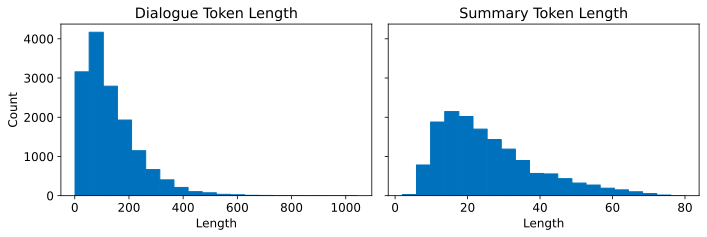

In [ ]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [ ]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024,
                                truncation=True)
    
    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=128,
                                     truncation=True)
    
    return {"input_ids": input_encodings["input_ids"],
            "attention_mask": input_encodings["attention_mask"],
            "labels": target_encodings["input_ids"]}

In [ ]:
dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, 
                                       batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:3586: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns)

In [ ]:
# Ìã∞Ï≤ò Ìè¨Ïã±(teacher forcing)
# ÌÖçÏä§Ìä∏ ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÎîîÏΩîÎçî ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÏùò Ï†ïÎ†¨
text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

decoder_input          label
step                                                             
1                                            [PAD]   Transformers
2                              [PAD, Transformers]            are
3                         [PAD, Transformers, are]        awesome
4                [PAD, Transformers, are, awesome]            for
5           [PAD, Transformers, are, awesome, for]           text
6     [PAD, Transformers, are, awesome, for, text]  summarization

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10, push_to_hub=True,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
trainer = Trainer(model=model, args=training_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"], 
                  eval_dataset=dataset_samsum_pt["validation"])

Cloning https://huggingface.co/fornoir/pegasus-samsum into local empty directory.


In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 3.2203, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}
{'loss': 3.0848, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}
{'loss': 3.1048, 'learning_rate': 3e-06, 'epoch': 0.03}
{'loss': 3.0867, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.04}
{'loss': 2.7972, 'learning_rate': 5e-06, 'epoch': 0.05}
{'loss': 2.8491, 'learning_rate': 6e-06, 'epoch': 0.07}
{'loss': 2.8246, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.08}
{'loss': 2.6051, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.09}
{'loss': 2.4961, 'learning_rate': 9e-06, 'epoch': 0.1}
{'loss': 2.2691, 'learning_rate': 1e-05, 'epoch': 0.11}
{'loss': 2.2506, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.12}
{'loss': 2.1764, 'learning_rate': 1.2e-05, 'epoch': 0.13}
{'loss': 2.2938, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.14}
{'loss': 2.1686, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.15}
{'loss': 2.0737, 'learning_rate': 1.5e-05, 'epoch': 0.16}
{'loss': 2.0694, 'learni

TrainOutput(global_step=920, training_loss=1.8293617352195408, metrics={'train_runtime': 2041.695, 'train_samples_per_second': 7.216, 'train_steps_per_second': 0.451, 'train_loss': 1.8293617352195408, 'epoch': 1.0})

In [ ]:
score = evaluate_summaries_pegasus(
    dataset_samsum["test"], rouge_metric, trainer.model, tokenizer,
    batch_size=2, column_text="dialogue", column_summary="summary")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 410/410 [08:49<00:00,  1.29s/it]


In [ ]:
score

{'rouge1': AggregateScore(low=Score(precision=0.36801120891958955, recall=0.5618822236586024, fmeasure=0.41935473792158223), mid=Score(precision=0.37956653628676806, recall=0.5742185804036798, fmeasure=0.4290685836123722), high=Score(precision=0.3908256201132397, recall=0.5877847627536572, fmeasure=0.43806362845112234)),
 'rouge2': AggregateScore(low=Score(precision=0.16628138461007433, recall=0.26108675281154997, fmeasure=0.1899870181152253), mid=Score(precision=0.1760286923419677, recall=0.27472967726059294, fmeasure=0.19983952641967329), high=Score(precision=0.18462419842461278, recall=0.2881284456263144, fmeasure=0.20895652368127945)),
 'rougeL': AggregateScore(low=Score(precision=0.2897274824850895, recall=0.4512485736028179, fmeasure=0.3321763019167128), mid=Score(precision=0.2987857768950388, recall=0.46348352292609174, fmeasure=0.3406541554478123), high=Score(precision=0.3082748021745119, recall=0.47685856429315926, fmeasure=0.34905055220158876)),
 'rougeLsum': AggregateScore(l

In [ ]:
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

rouge1   rouge2    rougeL  rougeLsum
pegasus  0.429069  0.19984  0.340654    0.34082

In [ ]:
pd.DataFrame(rouge_dict, index=[f"pegasus"])

rouge1   rouge2    rougeL  rougeLsum
pegasus  0.429069  0.19984  0.340654    0.34082

In [ ]:
trainer.push_to_hub("Training complete!")

Upload file pytorch_model.bin:   0%|          | 32.0k/2.13G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 3.43k/3.43k [00:00<?, ?B/s]

Upload file runs/Mar20_08-25-06_cb88c1615c82/events.out.tfevents.1679300779.cb88c1615c82.3446.0: 100%|########‚Ä¶

Upload file spiece.model:   2%|1         | 32.0k/1.82M [00:00<?, ?B/s]

Upload file runs/Mar20_08-25-06_cb88c1615c82/1679300779.0475676/events.out.tfevents.1679300779.cb88c1615c82.34‚Ä¶

To https://huggingface.co/fornoir/pegasus-samsum
   f4fe887..2b8d6ce  main -> main

   f4fe887..2b8d6ce  main -> main

To https://huggingface.co/fornoir/pegasus-samsum
   2b8d6ce..fb0db19  main -> main

   2b8d6ce..fb0db19  main -> main



'https://huggingface.co/fornoir/pegasus-samsum/commit/2b8d6ce98c358ab0b94fc113cd26f8745d29ebb1'

## ÎåÄÌôî ÏöîÏïΩ ÏÉùÏÑ±ÌïòÍ∏∞

In [ ]:
import transformers
transformers.logging.set_verbosity_error()

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128}
sample_text = dataset_samsum["test"][0]["dialogue"]
reference = dataset_samsum["test"][0]["summary"]

In [ ]:
# `/peagsus-samsum` ÏïûÏùÑ ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
pipe = pipeline("summarization", model="fornoir/pegasus-samsum")

In [ ]:
print("ÎåÄÌôî:")
print(sample_text)
print("\nÏ∞∏Ï°∞ ÏöîÏïΩ:")
print(reference)
print("\nÎ™®Îç∏ ÏöîÏïΩ:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

ÎåÄÌôî:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him üôÇ
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Ï∞∏Ï°∞ ÏöîÏïΩ:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.

Î™®Îç∏ ÏöîÏïΩ:
Amanda can't find Betty's number. Larry called Betty last time they were at the
park together. Hannah wants Amanda to text Larry. Amanda will text Larry.


In [ ]:
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Thom, Lewis and Leandro are going to write a book about transformers. Thom
helped build a library by Hugging Face. They are going to do it together.
